# Ensemble study

## Common Parameters

In [17]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data_loader import *

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

from Augmentor import Operations
from Augmentor.Operations import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_folder = "../data/isic2019/"
model_folder = 'models'
history_folder = 'history'
pred_result_folder_test = 'test_predict_results'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

ensembles_info = read_ensembles(os.path.join("..", pred_result_folder_test))
models_info = read_models_info(history_folder, pred_result_folder_test)

print(ensembles_info)

training_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Training_GroundTruth.csv')

df_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    training_image_folder, 
    ground_truth_file
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[{'models': ['DenseNet201', 'ResNet152'], 'pred_test': '../test_predict_results/DenseNet201-ResNet152'}, {'models': ['DenseNet201', 'EfficientNetB2', 'InceptionResNetV2'], 'pred_test': '../test_predict_results/DenseNet201-EfficientNetB2-InceptionResNetV2'}, {'models': ['DenseNet201', 'InceptionResNetV2', 'ResNet152'], 'pred_test': '../test_predict_results/DenseNet201-InceptionResNetV2-ResNet152'}, {'models': ['DenseNet201', 'InceptionV3', 'ResNet152'], 'pred_test': '../test_predict_results/DenseNet201-InceptionV3-ResNet152'}, {'models': ['DenseNet201', 'EfficientNetB2', 'InceptionV3'], 'pred_test': '../test_predict_results/DenseNet201-EfficientNetB2-InceptionV3'}]


# DenseNet201:
* Feature extract epochs: 6.
* Start learning rate: 0.001000
* Fine tuning learning rate: 0.000010
* Dropout rate: 0.300000
* Lambda(l2): None
* Batch size: 16

## Data Analysis

Training data has 82400 samples.


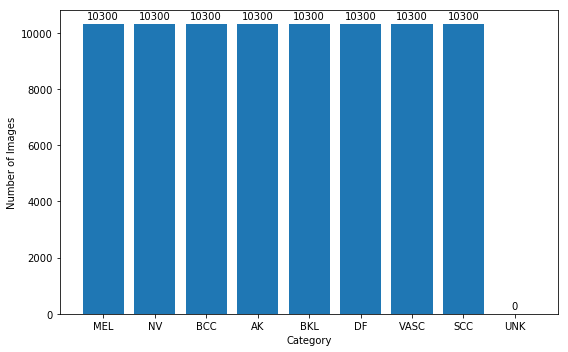

Test data has 5067 samples.


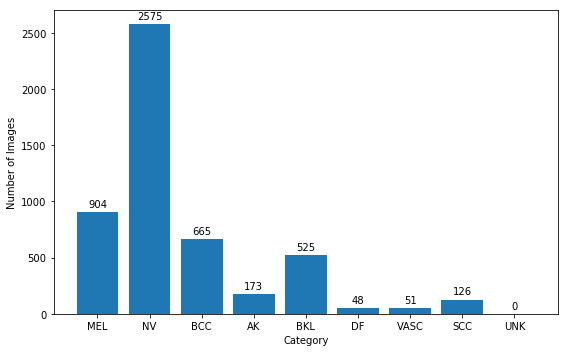

In [8]:
data_folder="../data/isic2019/sampled_balanced_82400_300"

all_category_names, count_per_category, df_ground_truth = get_count_per_category(data_folder)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_ground_truth_test = get_count_per_category(data_folder, test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

## Baseline - Single model (DenseNet201)

Models: ['DenseNet201', 'ResNet152']
	accuracy:  0.8833629366489046
	balanced_accuracy_score:  0.8192574833908918


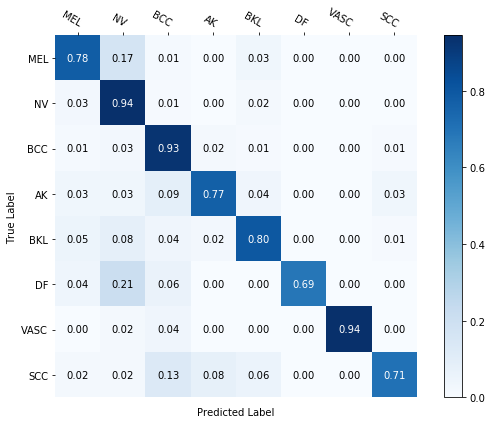

Models: ['DenseNet201', 'EfficientNetB2', 'InceptionResNetV2']
	accuracy:  0.8912571541345964
	balanced_accuracy_score:  0.8461677329420101


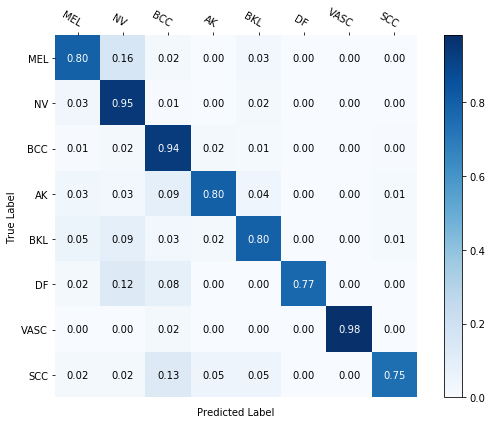

Models: ['DenseNet201', 'InceptionResNetV2', 'ResNet152']
	accuracy:  0.8918492204460233
	balanced_accuracy_score:  0.8308006974284416


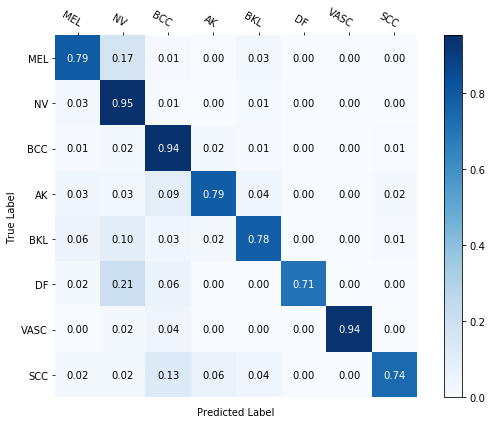

Models: ['DenseNet201', 'InceptionV3', 'ResNet152']
	accuracy:  0.8839550029603316
	balanced_accuracy_score:  0.8267219584106011


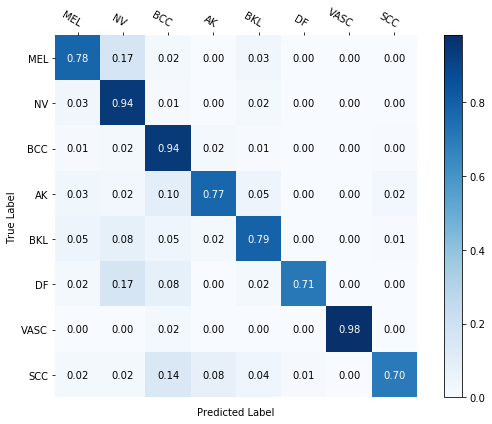

Models: ['DenseNet201', 'EfficientNetB2', 'InceptionV3']
	accuracy:  0.8849417801460431
	balanced_accuracy_score:  0.8410019158131099


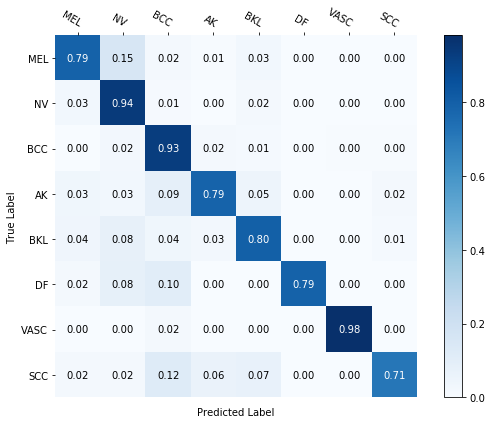

In [18]:
postfix = 'best_balanced_acc'
data_folder = "../data/isic2019/sampled_balanced_82400_300"

test_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
test_ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Test_GroundTruth.csv')
df_test_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    test_image_folder, 
    test_ground_truth_file,
    test=True
)
for ensemble in ensembles_info:
    # Load predicted results
    df_pred = pd.read_csv(os.path.join(ensemble["pred_test"], "no_unknown", f"{postfix}.csv"))
    df = pd.merge(df_pred, df_test_ground_truth, on='image')
    y_true = df['category']
    y_pred = df['pred_category']
    print(f'Models: {ensemble["models"]}')
    print('\taccuracy: ', accuracy_score(y_true, y_pred))
    print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
    fig3 = plot_confusion_matrix(
        y_true, 
        y_pred, 
        known_category_names, 
        normalize=True,
        figsize=(8, 6)
    )
    plt.show()